# Data Exploration Notebook
The purpose of this notebook is to explore the dataset in order to gain insights for future model building. It also works up to step 8 in the Supervised ML flow chart.

## Import Packages

In [1]:
import sys
import time
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Set up for imports of .py modules

In [36]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/evangelinekim/Developer/Projects/Roux_Institute/DS5220/DS5220-Supervised-ML-Project


## Import Python Modules

In [37]:
import utils.sml_utils as sml_utils
import utils.regression_utils as reg_utils

## Parameters

In [38]:
path_to_data = 'data/winequality-white.csv'
target_attr = 'quality'
test_size = 0.20
train_test_split_random_state = 42
missingness_threshold = 0.20

## Set up time

In [5]:
start = time.time()

## Reading in data

In [39]:
df = pd.read_csv(path_to_data, sep=";")
print(df.shape)
df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1. Missingness check

This was completed in phase 1!

In [61]:
print(df.shape)
df = df.dropna(subset=target_attr)
print(df.shape)

(4898, 12)
(4898, 12)


## 2. Train/Test Data Split

`wine_train_df` and `wine_test_df` were already created in phase 1! Here, we are making a copy of the data for exploration.

In [41]:
train_df = pd.read_csv('data/wine_train_df.csv').copy() # Make copy so original is not affected
train_cap_x_df = train_df.iloc[:, :-1]  # All columns except the last one
train_y_df = train_df.iloc[:, -1].to_frame()

## 3. Train/Validation Split

This step will be omitted because cross-validation will be used in later steps

## 4. Checking Attributes Types

In [42]:
train_cap_x_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [59]:
train_cap_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
dtypes: float64(11)
memory usage: 336.8 KB


In [71]:
train_cap_x_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.865046,0.279338,0.332731,6.450702,0.045734,35.094564,138.001149,0.994071,3.189293,0.489781,10.508840
std,0.844483,0.101606,0.119758,5.139311,0.021797,16.676958,42.067667,0.003022,0.150183,0.113590,1.227887
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,10.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,33.000000,134.000000,0.993800,3.180000,0.470000,10.400000
75%,7.300000,0.330000,0.380000,10.000000,0.050000,46.000000,167.000000,0.996200,3.280000,0.550000,11.400000
max,11.800000,1.100000,1.660000,65.800000,0.346000,146.500000,313.000000,1.038980,3.820000,1.080000,14.200000


<Figure size 1200x800 with 0 Axes>

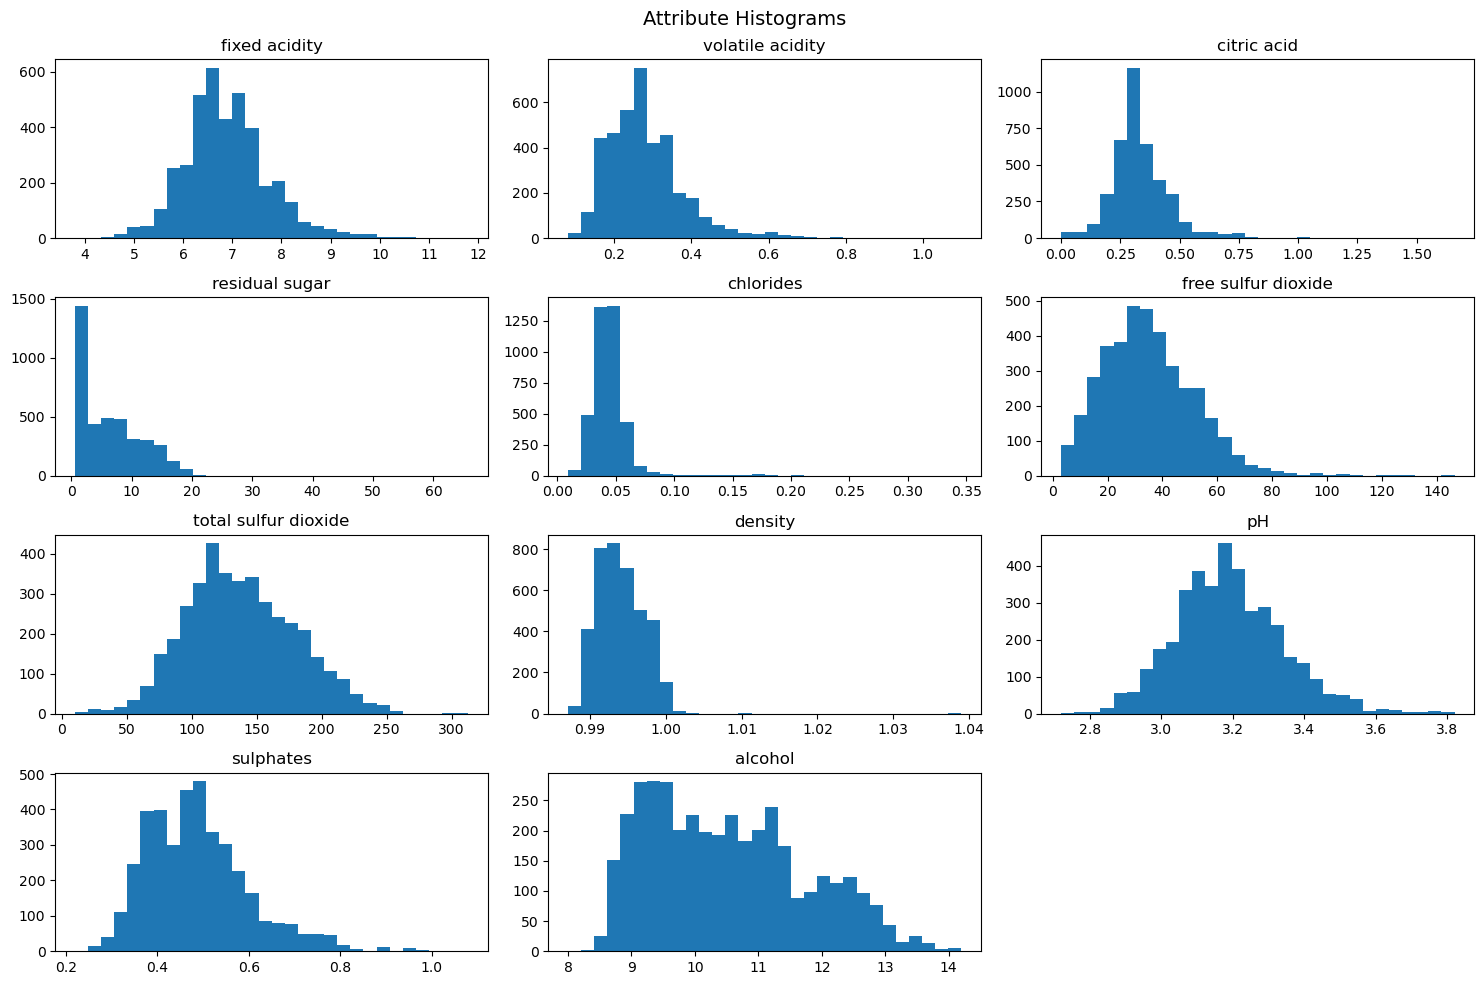

In [104]:
## Histograms for all the attributes
plt.figure(figsize=(12, 8))
train_cap_x_df.hist(bins=30, figsize=(15, 10), grid=False)
plt.suptitle("Attribute Histograms", fontsize=14)
plt.tight_layout()

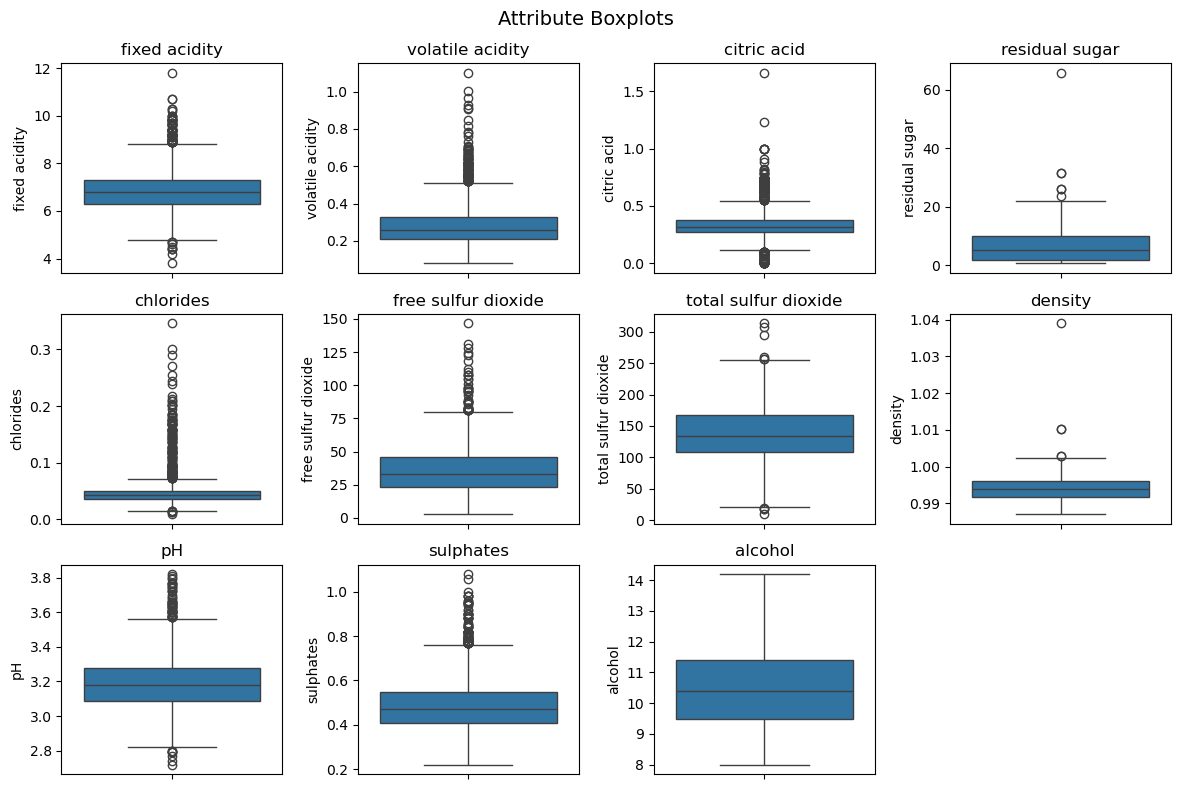

In [105]:
## Box plots for all the attributes
plt.figure(figsize=(12, 8))
for index, column in enumerate(train_cap_x_df.columns, 1):
    plt.subplot(3, 4, index)
    sns.boxplot(y=train_cap_x_df[column])
    plt.title(column)
plt.suptitle("Attribute Boxplots", fontsize=14)
plt.tight_layout()

Text(0.5, 1.0, 'Attribute Correlation Matrix')

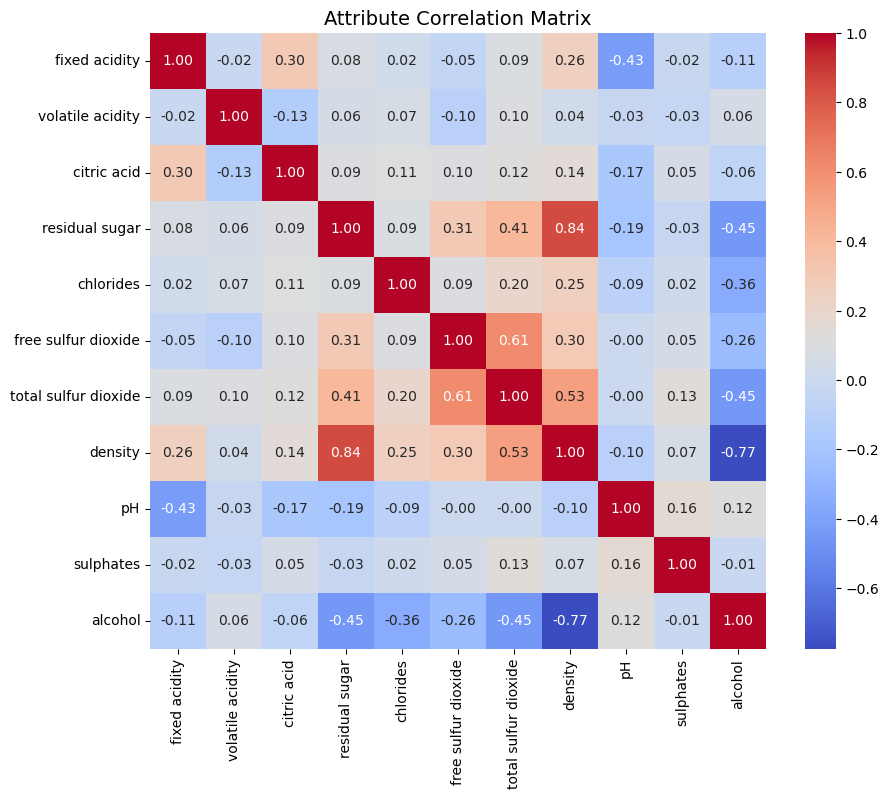

In [106]:
## Attribute correlation matrix
corr_matrix = train_cap_x_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Attribute Correlation Matrix", fontsize=14)

## 5. Handle Missing Values

In [108]:
train_df.isna().sum() # There are no missing values in the data set.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [63]:
return_dict = sml_utils.get_missingness(train_cap_x_df, missingness_threshold)
missingness_drop_list = return_dict['missingness_drop_list']

fixed acidity missingness = 0.0
volatile acidity missingness = 0.0
citric acid missingness = 0.0
residual sugar missingness = 0.0
chlorides missingness = 0.0
free sulfur dioxide missingness = 0.0
total sulfur dioxide missingness = 0.0
density missingness = 0.0
pH missingness = 0.0
sulphates missingness = 0.0
alcohol missingness = 0.0

missingness_drop_list:
[]


## 6. Exclude non-ML Attributes

In [64]:
train_cap_x_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [65]:
non_ml_attr_list = [] # no non-machine learning attributes were identified

## 7. Remove Unwanted Attributes

In [66]:
train_cap_x_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [67]:
ml_attr_drop_list = []

## 8. ML Attribute Configuration

In [68]:
ml_ignore_list = missingness_drop_list + non_ml_attr_list + ml_attr_drop_list
ml_ignore_list

[]

In [69]:
# All of the attributes in this data set are continuous and numerical
numerical_attr = list(train_cap_x_df.columns)

# There were no nominal attributes found in this data set.
# They are all continuous numerical values from a series of physicochemical tests.
nominal_attr = []

assert(train_cap_x_df.shape[1] == len(ml_ignore_list) + len(nominal_attr) + len(numerical_attr))

print(f'ml_ignore_list: {ml_ignore_list}')
print(f'\nnumerical_attr: {numerical_attr}')
print(f'nominal_attr: {nominal_attr}')
print(f'\nnumber of machine learning attributes: {len(numerical_attr) + len(nominal_attr)}')
print(f'\nnumerical_attr and nominal_attr: {numerical_attr + nominal_attr}')

ml_ignore_list: []

numerical_attr: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
nominal_attr: []

number of machine learning attributes: 11

numerical_attr and nominal_attr: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Script Runtime

In [ ]:
end = time.time()
runtime = (end - start) / 60
print(f'Script runtime: {runtime:.4f} minutes')